In [36]:
import logging 
import pickle
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB 
from sklearn.metrics import(
    accuracy_score,
    f1_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay
)
logger = logging.getLogger()
logger.setLevel(logging.ERROR)

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [37]:
#IMPORT DATA SET
df_raw = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/naive-bayes-project-tutorial/main/playstore_reviews.csv')
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   package_name  891 non-null    object
 1   review        891 non-null    object
 2   polarity      891 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 21.0+ KB


In [38]:
#DATA SET SAMPLES
df_raw.sample(10, random_state=2025)

,package_name,review,polarity
622,com.uc.browser.en,good good for slow connection this uc minilit...,1
25,com.facebook.katana,can't install (error code: -505) have samsung...,0
307,com.tencent.mm,"bad new update, sight by swipe in chats gone ...",0
783,org.mozilla.firefox,"all you need, easy and gives you control open...",0
834,com.hamropatro,well done nicely designed .....this app had c...,1
109,com.linkedin.android,organization logo whenever i try to add my or...,0
339,com.viber.voip,issue in last online time it doesn't refresh ...,0
560,jabanaki.todo.todoly,"great, simple, recommend love this app. looki...",1
595,com.evernote,"neat idea, but let-down by no linux support. ...",0
509,com.Slack,free the gifs not reliable on a slower networ...,0


In [39]:
stopwords.words('english')

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [40]:
df_baking = df_raw.copy()
df_baking['polarity'] = df_baking['polarity'].apply(lambda x: 'positive' if x==1 else 'negative')
df_baking['polarity'] = df_baking['polarity'].astype('category')
stopwords = stopwords.words('english')
df = df_baking.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   package_name  891 non-null    object  
 1   review        891 non-null    object  
 2   polarity      891 non-null    category
dtypes: category(1), object(2)
memory usage: 15.0+ KB


In [41]:
df_train, df_test = train_test_split(
    df, test_size=0.2, 
    stratify=df['polarity'], 
    random_state=2025
)

In [42]:
df_train.describe(include='category').T


,count,unique,top,freq
polarity,712,2,negative,467


In [56]:
df_train['review'].sample(20, random_state=2025)

492     excellent this app is great, keep up the good...
489     works really well slack for android works fla...
388     mms failure still have issues with group mess...
451     its really good but.. not everyone in your ad...
126     it takes me two levels back and no boosters n...
318     good job but.... please reduce its size. runn...
854     #1 great game. challenging to the point where...
419     like button the like button, you know the thi...
442     contacts name and pic i wanna know why alot o...
828                    dami xa hajur harule ni hernu hai
561     can't get off first base. having give problem...
659     it's all awesome. can you devs please add mor...
416     not good i had for a while but is not working...
481     great features, but my notifications don't wo...
444     can't work after latest update i keep getting...
135     simple fun game this is the type of game that...
178     great game i've enjoyed playing ever since i ...
130     candy crush. i have bee

In [43]:
X_train = df_train['review'].copy()
y_train = df_train['polarity'].copy()
X_test = df_test['review'].copy()
y_test = df_test['polarity'].copy()


In [44]:
label_encoder = LabelEncoder()
y_train_enc = label_encoder.fit_transform(y_train)
y_test_enc = label_encoder.transform(y_test)

In [45]:
clf_nb_p = Pipeline([
    ('vectorizer', CountVectorizer(stop_words='english')),
    ('nb', MultinomialNB())
])

In [46]:
clf_nb_p.fit(X_train, y_train_enc)

Pipeline(steps=[('vectorizer', CountVectorizer(stop_words='english')),
                ('nb', MultinomialNB())])

In [48]:
y_hat = clf_nb_p.predict(X_test)
print(f'accuracy:{accuracy_score(y_test_enc, y_hat):.2f}')
print(f'f1_score:{f1_score(y_test_enc, y_hat):.2f}')

accuracy:0.82
f1_score:0.69


              precision    recall  f1-score   support

    negative       0.81      0.95      0.87       117
    positive       0.86      0.58      0.69        62

    accuracy                           0.82       179
   macro avg       0.83      0.76      0.78       179
weighted avg       0.83      0.82      0.81       179



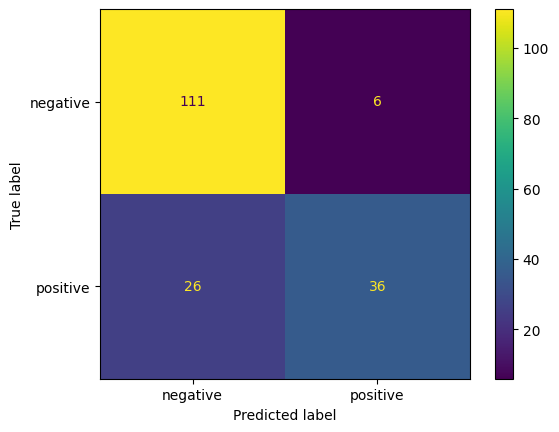

In [52]:
print(classification_report(y_test_enc, y_hat, target_names=label_encoder.classes_))
ConfusionMatrixDisplay.from_predictions(y_test_enc, y_hat, display_labels=label_encoder.classes_)
plt.show()

In [57]:
from sklearn.datasets import load_iris
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import minmax_scale


In [60]:
X, y = load_iris(return_X_y=True, as_frame=True)
df_raw = X.copy()
df_raw['species'] = y
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [61]:
df_raw.sample(10, random_state=2025)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
2,4.7,3.2,1.3,0.2,0
148,6.2,3.4,5.4,2.3,2
112,6.8,3.0,5.5,2.1,2
132,6.4,2.8,5.6,2.2,2
0,5.1,3.5,1.4,0.2,0
113,5.7,2.5,5.0,2.0,2
34,4.9,3.1,1.5,0.2,0
51,6.4,3.2,4.5,1.5,1
135,7.7,3.0,6.1,2.3,2
5,5.4,3.9,1.7,0.4,0


In [62]:
df_baking = df_raw.copy()
df_baking.columns = df_baking.columns.str.replace('( ','').str.replace(')', '').str.replace(' ', '_')
df_baking['species'] = df_baking['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})
df_baking['species'] = df_baking['species'].astype('category')
df = df_baking.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   sepal_length_(cm  150 non-null    float64 
 1   sepal_width_(cm   150 non-null    float64 
 2   petal_length_(cm  150 non-null    float64 
 3   petal_width_(cm   150 non-null    float64 
 4   species           150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB


In [64]:
df_train, df_test = train_test_split(
    df, test_size=0.2,
    stratify=df['species'],
    random_state=2025
)

In [65]:
display(df_train.describe(include='number').T)
display(df_train.describe(include='category').T)



,count,mean,std,min,25%,50%,75%,max
sepal_length_(cm,120.0,5.830000,0.814119,4.3,5.100,5.8,6.4,7.9
sepal_width_(cm,120.0,3.054167,0.436159,2.0,2.800,3.0,3.4,4.4
petal_length_(cm,120.0,3.753333,1.766016,1.1,1.575,4.4,5.1,6.9
petal_width_(cm,120.0,1.203333,0.760355,0.1,0.300,1.3,1.8,2.5


,count,unique,top,freq
species,120,3,setosa,40


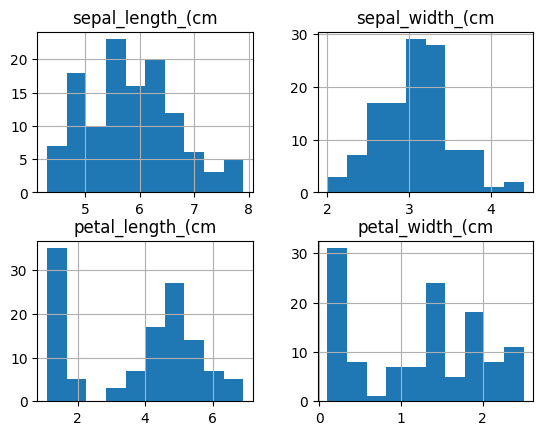

In [66]:
df_train.hist()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

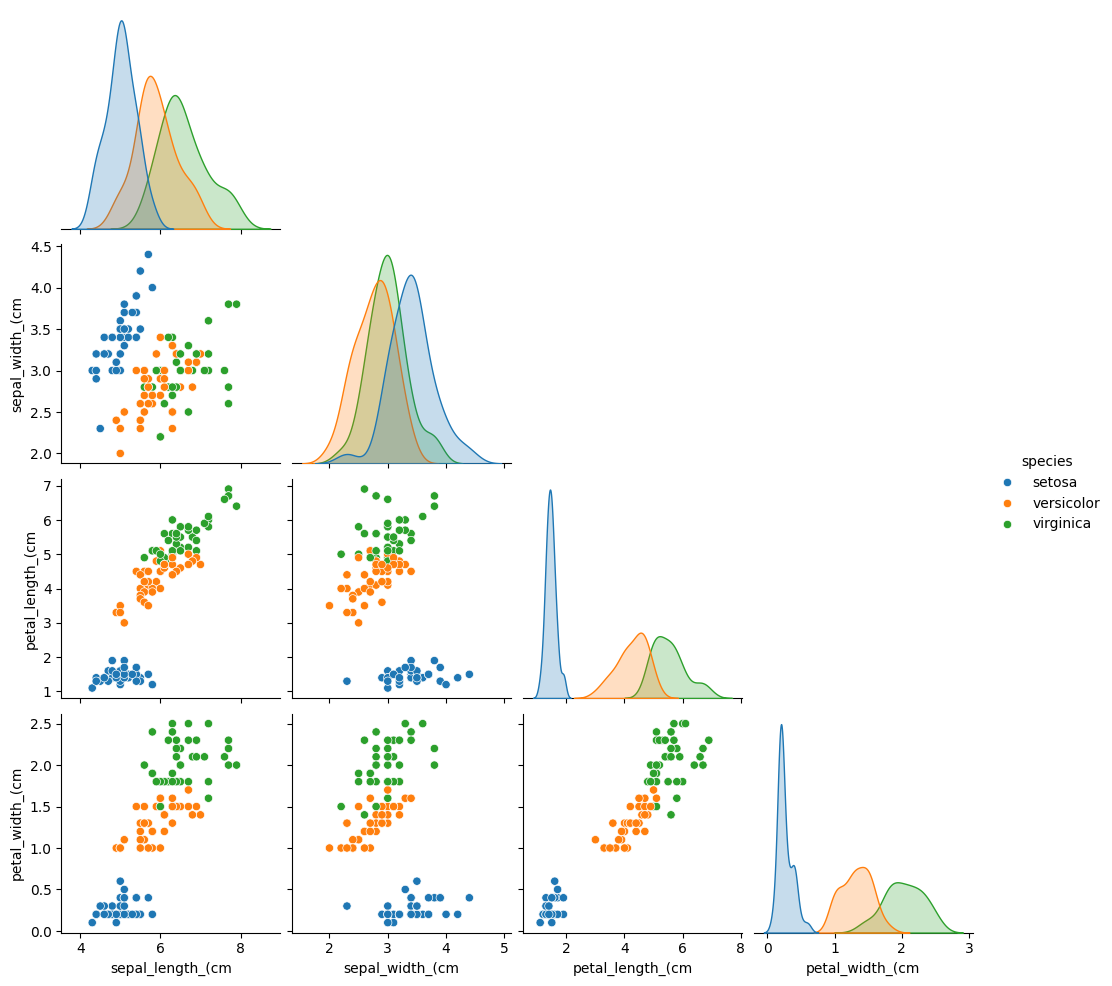

In [67]:
sns.pairplot(df_train, hue='species', corner=True)
plt.show

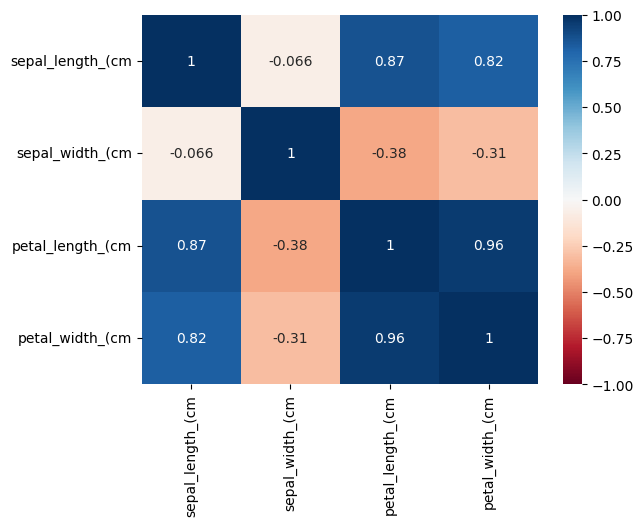

In [68]:
sns.heatmap(df_train.select_dtypes('number').corr(), vmin=-1, vmax=1, cmap='RdBu', annot=True)
plt.show()

In [69]:
X_train = df_train.drop(columns=['species'])
y_train = df_train['species']
X_test = df_test.drop(columns=['species'])
y_test = df_test['species']

In [70]:
label_encoder = LabelEncoder()
y_train_enc = label_encoder.fit_transform(y_train)
y_test_enc = label_encoder.transform(y_test)


In [73]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
clf_nb_p = Pipeline([
    ('scaler', MinMaxScaler()),
    ('nb', GaussianNB())
])

In [74]:
clf_nb_p.fit(X_train, y_train_enc)

Pipeline(steps=[('scaler', MinMaxScaler()), ('nb', GaussianNB())])

In [76]:
y_hat = clf_nb_p.predict(X_test)
print(f'accuracy: {accuracy_score(y_test_enc, y_hat):.2f}')

accuracy: 0.97


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.91      1.00      0.95        10
   virginica       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



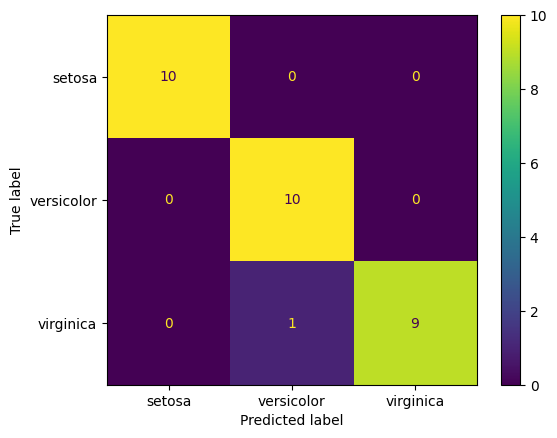

In [78]:
print(classification_report(y_test_enc, y_hat, target_names=label_encoder.classes_))
ConfusionMatrixDisplay.from_predictions(y_test_enc, y_hat, display_labels=label_encoder.classes_)
plt.show()